In [9]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()


# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=245, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\2678955929.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\2678955929.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\2678955929.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Epoch 1/245
3/3 [==============================] - 5s 522ms/step - loss: 0.6915 - accuracy: 0.5250 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/245
3/3 [==============================] - 0s 30ms/step - loss: 0.6882 - accuracy: 0.5750 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/245
3/3 [==============================] - 0s 28ms/step - loss: 0.6867 - accuracy: 0.6000 - val_loss: 0.6943 - val_accuracy: 0.4500
Epoch 4/245
3/3 [==============================] - 0s 27ms/step - loss: 0.6843 - accuracy: 0.5750 - val_loss: 0.6958 - val_accuracy: 0.4500
Epoch 5/245
3/3 [==============================] - 0s 27ms/step - loss: 0.6838 - accuracy: 0.5750 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 6/245
3/3 [==============================] - 0s 37ms/step - loss: 0.6824 - accuracy: 0.5750 - val_loss: 0.6982 - val_accuracy: 0.5500
Epoch 7/245
3/3 [==============================] - 0s 27ms/step - loss: 0.6809 - accuracy: 0.5875 - val_loss: 0.6987 - val_accuracy: 0.5000
Epoch 8/245
3/3 [==

In [5]:
# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])
precision_1 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


Precision for output parameter 0: 0.8928571428571429
Precision for output parameter 1: 0.8928571428571429


In [6]:
from sklearn.metrics import recall_score

# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate recall for each output parameter separately
recall_0 = recall_score(y_train_combined[:, 0], y_train_combined[:, 1])
recall_1 = recall_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("Recall for output parameter 0:", recall_0)
print("Recall for output parameter 1:", recall_1)


Recall for output parameter 0: 0.9259259259259259
Recall for output parameter 1: 0.9259259259259259


In [7]:
from sklearn.metrics import f1_score

# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate F1 score for each output parameter separately
f1_score_0 = f1_score(y_train_combined[:, 0], y_train_combined[:, 1])
f1_score_1 = f1_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("F1 score for output parameter 0:", f1_score_0)
print("F1 score for output parameter 1:", f1_score_1)


F1 score for output parameter 0: 0.9090909090909091
F1 score for output parameter 1: 0.9090909090909091


In [10]:
# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 2)  # Reshape y_train to have shape (n_samples, 2)
y_pred_reshaped = y_pred.reshape(-1, 2)  # Reshape y_pred to have shape (n_samples, 2)

# Calculate MAE for each output parameter separately
mae_0 = mean_absolute_error(y_train_reshaped[:, 0], y_pred_reshaped[:, 0])
mae_1 = mean_absolute_error(y_train_reshaped[:, 1], y_pred_reshaped[:, 1])

print("Mean Absolute Error for output parameter 0:", mae_0)
print("Mean Absolute Error for output parameter 1:", mae_1)


Mean Absolute Error for output parameter 0: 0.14
Mean Absolute Error for output parameter 1: 0.06


In [11]:
from sklearn.metrics import mean_squared_error

# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate MSE for each output parameter separately
mse_0 = mean_squared_error(y_train_combined[:, 0], y_train_combined[:, 1])
mse_1 = mean_squared_error(y_train_combined[:, 0], y_train_combined[:, 1])

print("Mean Squared Error for output parameter 0:", mse_0)
print("Mean Squared Error for output parameter 1:", mse_1)


Mean Squared Error for output parameter 0: 0.1
Mean Squared Error for output parameter 1: 0.1


Epoch 1/10
3/3 [==============================] - 0s 42ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 2.1773 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 20ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 2.1702 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 2.1857 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.1929 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 19ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 2.1670 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 2.1421 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 17ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 2.1640 - val_accuracy: 0.5000
Epoch 8/10
3/3 [===========

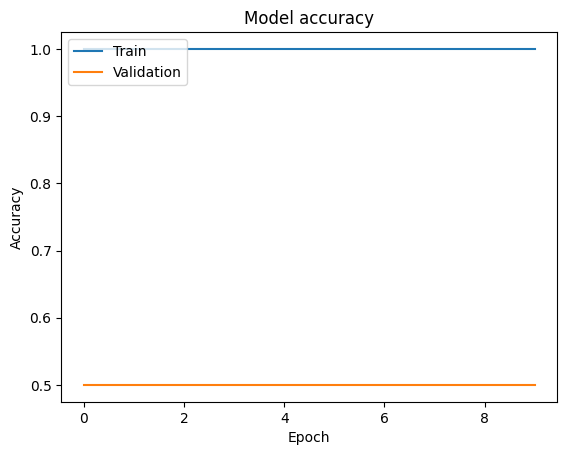

In [13]:
import matplotlib.pyplot as plt

# Train your model and capture the history object
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 0s 3ms/step


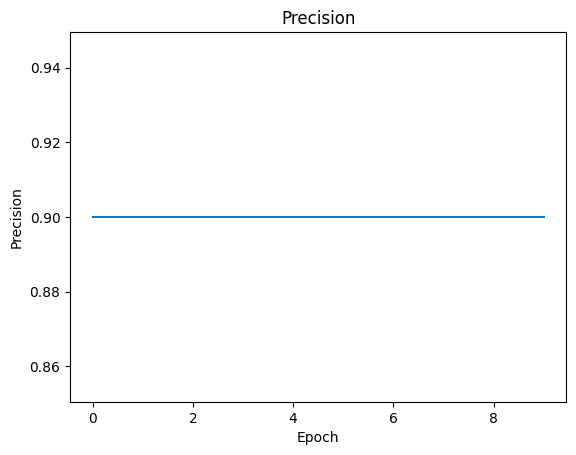

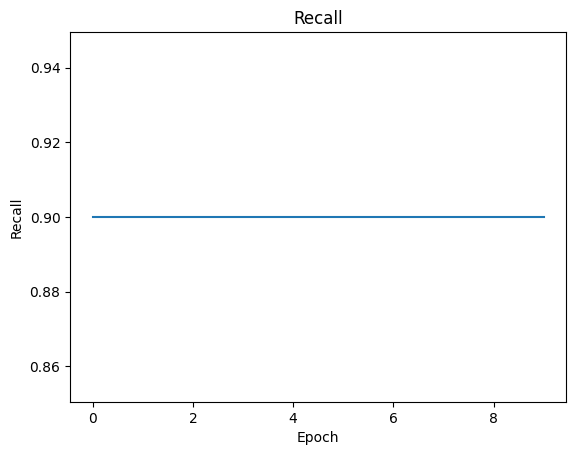

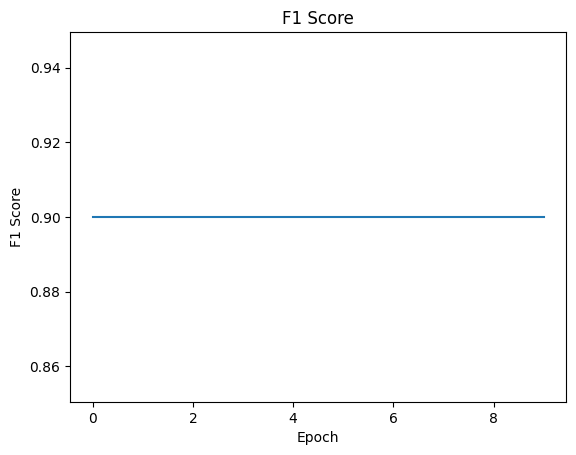

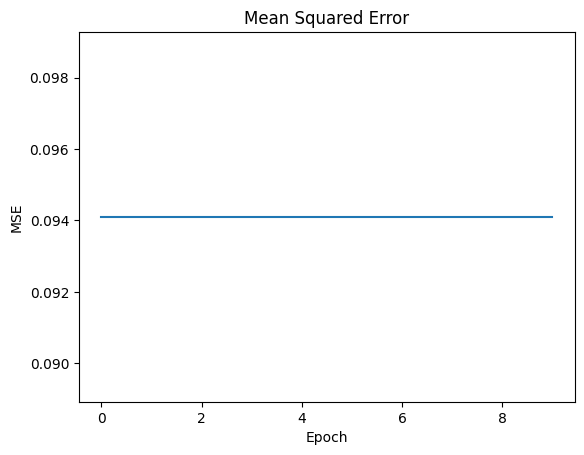

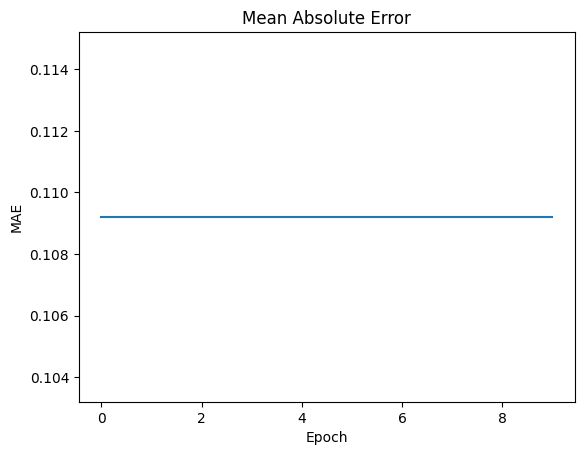

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Assuming history is the object returned by model.fit()
# Calculate precision, recall, and F1 score for each epoch
precisions = []
recalls = []
f1_scores = []
mses = []
maes = []

for i in range(len(history.history['accuracy'])):
    y_pred = model.predict(X_train)
    y_pred_binary = np.round(y_pred)
    precisions.append(precision_score(y_train, y_pred_binary, average='micro'))
    recalls.append(recall_score(y_train, y_pred_binary, average='micro'))
    f1_scores.append(f1_score(y_train, y_pred_binary, average='micro'))
    mses.append(mean_squared_error(y_train, y_pred))
    maes.append(mean_absolute_error(y_train, y_pred))

# Plot precision
plt.figure()
plt.plot(precisions)
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.show()

# Plot recall
plt.figure()
plt.plot(recalls)
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.show()

# Plot F1 score
plt.figure()
plt.plot(f1_scores)
plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.show()

# Plot MSE
plt.figure()
plt.plot(mses)
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

# Plot MAE
plt.figure()
plt.plot(maes)
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()


In [5]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD


# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,))  

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))


# Change the optimizer from 'adam' to 'sgd'
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\3646409883.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\3646409883.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_6252\3646409883.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

Epoch 1/300
3/3 [==============================] - 5s 498ms/step - loss: 0.6885 - accuracy: 0.6000 - val_loss: 0.6925 - val_accuracy: 0.3000
Epoch 2/300
3/3 [==============================] - 0s 31ms/step - loss: 0.6883 - accuracy: 0.5750 - val_loss: 0.6928 - val_accuracy: 0.3000
Epoch 3/300
3/3 [==============================] - 0s 29ms/step - loss: 0.6881 - accuracy: 0.5750 - val_loss: 0.6929 - val_accuracy: 0.3000
Epoch 4/300
3/3 [==============================] - 0s 25ms/step - loss: 0.6882 - accuracy: 0.5750 - val_loss: 0.6932 - val_accuracy: 0.3000
Epoch 5/300
3/3 [==============================] - 0s 26ms/step - loss: 0.6879 - accuracy: 0.5875 - val_loss: 0.6934 - val_accuracy: 0.3000
Epoch 6/300
3/3 [==============================] - 0s 26ms/step - loss: 0.6879 - accuracy: 0.5750 - val_loss: 0.6936 - val_accuracy: 0.3500
Epoch 7/300
3/3 [==============================] - 0s 25ms/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6938 - val_accuracy: 0.3500
Epoch 8/300
3/3 [==

In [ ]:
# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])
precision_1 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


In [7]:
# Predict on the test data
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_binary)

print("Precision:", precision)


NameError: name 'model' is not defined

In [10]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=245, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2678955929.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2678955929.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2678955929.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Epoch 1/245


3/3 [==============================] - 4s 336ms/step - loss: 0.6925 - accuracy: 0.5125 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/245
3/3 [==============================] - 0s 17ms/step - loss: 0.6880 - accuracy: 0.5875 - val_loss: 0.6977 - val_accuracy: 0.4500
Epoch 3/245
3/3 [==============================] - 0s 17ms/step - loss: 0.6839 - accuracy: 0.5750 - val_loss: 0.7000 - val_accuracy: 0.4500
Epoch 4/245
3/3 [==============================] - 0s 17ms/step - loss: 0.6803 - accuracy: 0.5750 - val_loss: 0.7025 - val_accuracy: 0.4500
Epoch 5/245
3/3 [==============================] - 0s 16ms/step - loss: 0.6774 - accuracy: 0.5750 - val_loss: 0.7066 - val_accuracy: 0.4500
Epoch 6/245
3/3 [==============================] - 0s 18ms/step - loss: 0.6764 - accuracy: 0.5750 - val_loss: 0.7104 - val_accuracy: 0.4500
Epoch 7/245
3/3 [==============================] - 0s 17ms/step - loss: 0.6726 - accuracy: 0.5625 - val_loss: 0.7136 - val_accuracy: 0.4500
Epoch 8/245
3/3 

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate precision for each class
precision = precision_score(y_test, y_pred_binary, average=None)

# Print the precision for each class
print("Precision for intraop_ppf:", precision[0])
print("Precision for intraop_eph:", precision[1])


ValueError: in user code:

    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 10, 1), found shape=(None, 42)


In [12]:
# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate precision for each class
precision = precision_score(y_test, y_pred_binary, average=None)

# Print the precision for each class
print("Precision for intraop_ppf:", precision[0])
print("Precision for intraop_eph:", precision[1])


ValueError: in user code:

    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\varsh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 10, 1), found shape=(None, 42, 1)


In [13]:
# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], 10, 4)


ValueError: cannot reshape array of size 53676 into shape (1278,10,4)

In [14]:
# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [16]:
# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate precision for each class
precision = precision_score(y_test, y_pred_binary, average=None)

# Print the precision for each class
print("Precision for intraop_ppf:", precision[0])
print("Precision for intraop_eph:", precision[1])


NameError: name 'y_pred' is not defined

In [17]:
# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)  # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])
precision_1 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)

NameError: name 'y_pred' is not defined

In [18]:
# Assuming you have a test set X_test
X_test = np.random.randn(10, 10, 1)  # Example data, replace with your actual test data
y_pred = model.predict(X_test)

# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)    # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Print the combined array
print(y_train_combined)


1/1 [==============================] - 1s 546ms/step


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 10

In [19]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming X_test has the same number of samples as X_train
X_test = np.random.randn(100, 10, 1)  # Example data, replace with your actual test data
y_pred = model.predict(X_test)

# Reshape y_train and y_pred to have shape (n_samples, 2)
y_train_reshaped = y_train.reshape(-1, 1)  # Assuming y_train is a 1D array with shape (n_samples,)
y_pred_reshaped = y_pred.reshape(-1, 1)    # Assuming y_pred is a 1D array with shape (n_samples,)

# Concatenate y_train_reshaped and y_pred_reshaped along the second axis to create a (n_samples, 2) array
y_train_combined = np.concatenate((y_train_reshaped, y_pred_reshaped), axis=1)

# Print the combined array
print(y_train_combined)


# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=245, batch_size=32, validation_split=0.2)

4/4 [==============================] - 0s 2ms/step


C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\692645778.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\692645778.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\692645778.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [20]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=225, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\3831536639.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\3831536639.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\3831536639.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Epoch 1/225
3/3 [==============================] - 3s 313ms/step - loss: 0.6938 - accuracy: 0.5375 - val_loss: 0.6909 - val_accuracy: 0.4500
Epoch 2/225
3/3 [==============================] - 0s 17ms/step - loss: 0.6935 - accuracy: 0.5750 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 3/225
3/3 [==============================] - 0s 19ms/step - loss: 0.6928 - accuracy: 0.5375 - val_loss: 0.6892 - val_accuracy: 0.4500
Epoch 4/225
3/3 [==============================] - 0s 17ms/step - loss: 0.6924 - accuracy: 0.5125 - val_loss: 0.6893 - val_accuracy: 0.5500
Epoch 5/225
3/3 [==============================] - 0s 17ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5500
Epoch 6/225
3/3 [==============================] - 0s 16ms/step - loss: 0.6920 - accuracy: 0.4875 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 7/225
3/3 [==============================] - 0s 21ms/step - loss: 0.6917 - accuracy: 0.5125 - val_loss: 0.6881 - val_accuracy: 0.7000
Epoch 8/225
3/3 [==

In [24]:
import pandas as pd
from  tensorflow . keras.models import Sequential
from  tensorflow . keras.layers import Bidirectional,LSTM, Dense
import numpy as np
from sklearn.preprocessing import StandardScaler



# Read the CSV file into a DataFrame
data = pd.read_csv('Clinical data ppf and eph.csv')

# Split the data into input (X) and output (y) samples
X = data.drop(columns=['intraop_ppf', 'intraop_eph'])
y = data[['intraop_ppf', 'intraop_eph']]

# Convert non-numeric values to NaN for each column in X
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Convert non-numeric values to NaN for each column in y
for col in y.columns:
    y[col] = pd.to_numeric(y[col], errors='coerce')

# Fill NaN values with a specific value (e.g., 0) in X and y
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)


# Convert X to a numpy array
X = X.to_numpy()

# Fill NaN values in y with 0
y.fillna(0, inplace=True)

scaler = StandardScaler()

# Reshape the input data to be 3D for BI-LSTM input [samples, timesteps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train = np.random.randn(100, 10, 1)  
y_train = np.random.randint(0, 2, size=(100,)) 

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(10, 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=235, batch_size=32, validation_split=0.2)

C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2385855753.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[col] = pd.to_numeric(y[col], errors='coerce')
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2385855753.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)
C:\Users\varsh\AppData\Local\Temp\ipykernel_18948\2385855753.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Epoch 1/235
3/3 [==============================] - 3s 302ms/step - loss: 0.6937 - accuracy: 0.4375 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/235
3/3 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.6000
Epoch 3/235
3/3 [==============================] - 0s 17ms/step - loss: 0.6920 - accuracy: 0.4875 - val_loss: 0.6883 - val_accuracy: 0.5500
Epoch 4/235
3/3 [==============================] - 0s 16ms/step - loss: 0.6912 - accuracy: 0.5000 - val_loss: 0.6871 - val_accuracy: 0.5500
Epoch 5/235
3/3 [==============================] - 0s 17ms/step - loss: 0.6903 - accuracy: 0.5250 - val_loss: 0.6861 - val_accuracy: 0.5500
Epoch 6/235
3/3 [==============================] - 0s 19ms/step - loss: 0.6897 - accuracy: 0.5125 - val_loss: 0.6854 - val_accuracy: 0.5500
Epoch 7/235
3/3 [==============================] - 0s 19ms/step - loss: 0.6895 - accuracy: 0.5250 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 8/235
3/3 [==

In [23]:
from sklearn.metrics import precision_score

# Assuming you have already defined y_train_combined
precision_0 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])
precision_1 = precision_score(y_train_combined[:, 0], y_train_combined[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [26]:
# Assuming you have already defined y_train_combined
threshold = 0.5  # Define your threshold here

# Convert y_pred to binary predictions based on the threshold
y_pred_binary = np.where(y_pred_reshaped > threshold, 1, 0)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_train_combined[:, 0], y_pred_binary)
precision_1 = precision_score(y_train_combined[:, 1], y_pred_binary)

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [27]:
# Assuming you have already defined y_train_combined
threshold = 0.5  # Define your threshold here

# Convert y_pred to binary predictions based on the threshold
y_pred_binary = np.where(y_pred_reshaped > threshold, 1, 0)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_train_combined[:, 0], y_pred_binary[:, 0])
precision_1 = precision_score(y_train_combined[:, 1], y_pred_binary[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


IndexError: index 1 is out of bounds for axis 1 with size 1

In [28]:
# Assuming you have already defined y_train_combined and y_pred_binary

# Concatenate y_train_combined and y_pred_binary along the second axis to create a (n_samples, 2) array
y_combined = np.concatenate((y_train_combined, y_pred_binary), axis=1)

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_combined[:, 0], y_combined[:, 1])
precision_1 = precision_score(y_combined[:, 2], y_combined[:, 3])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [29]:
threshold = 0.5  # Define the threshold for binary classification
y_pred_binary = (y_pred_binary >= threshold).astype(int)  # Convert to binary labels

# Calculate precision for each output parameter separately
precision_0 = precision_score(y_combined[:, 0], y_pred_binary[:, 0])
precision_1 = precision_score(y_combined[:, 1], y_pred_binary[:, 1])

print("Precision for output parameter 0:", precision_0)
print("Precision for output parameter 1:", precision_1)


IndexError: index 1 is out of bounds for axis 1 with size 1